<a href="https://colab.research.google.com/github/jani2771/Smart-Grid-Optimization-Using-Machine-Learning/blob/main/Minor_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Import necessary libraries for LSTM
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv("smart_grid_stability.csv")


In [ ]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [ ]:
df.isnull().sum()

,0
tau1,0
tau2,0
tau3,0
tau4,0
p1,0
p2,0
p3,0
p4,0
g1,0
g2,0


In [ ]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403


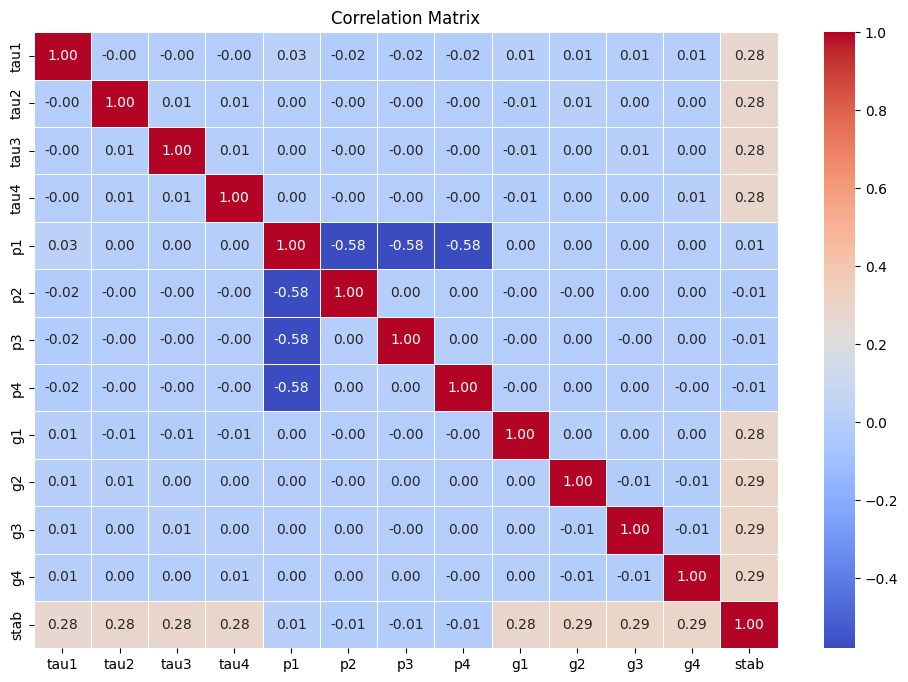

Correlation with 'stab':
 stab    1.000000
g3      0.293684
g2      0.293684
g4      0.293684
tau2    0.283417
tau3    0.283417
tau4    0.283417
g1      0.282774
tau1    0.275761
p1      0.010278
p4     -0.005951
p2     -0.005951
p3     -0.005951
Name: stab, dtype: float64


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

correlation_with_stab = correlation_matrix['stab'].sort_values(ascending=False)
print("Correlation with 'stab':\n", correlation_with_stab)

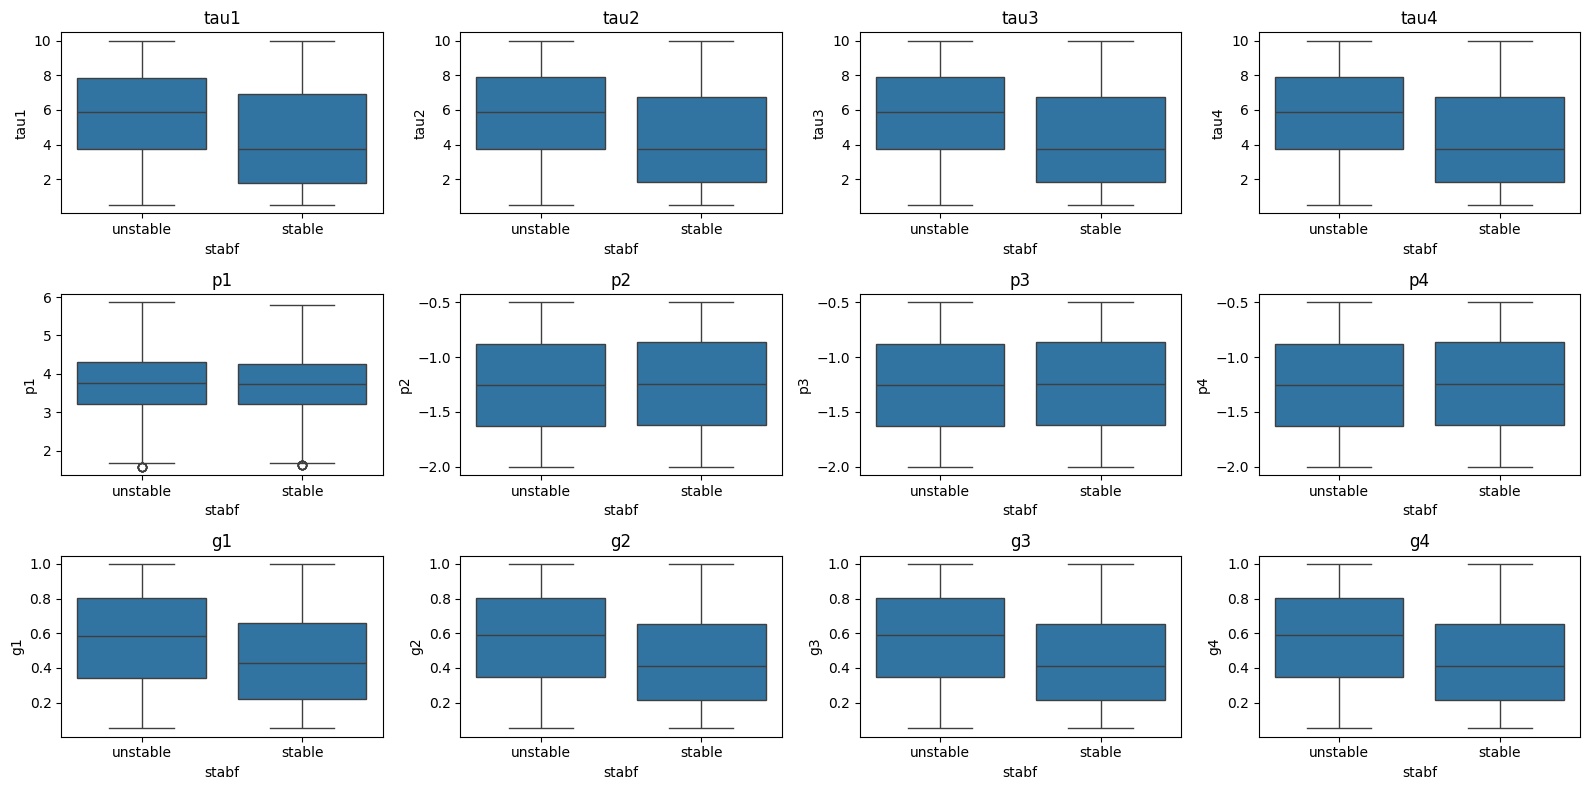

In [ ]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(df.columns[:-2]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='stabf', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
class_distribution = df['stabf'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
stabf
unstable    38280
stable      21720
Name: count, dtype: int64


RANDOM FOREST CLASSIFIER


In [ ]:

le = LabelEncoder()
df['stabf_encoded'] = le.fit_transform(df['stabf'])

X = df.drop(['stabf', 'stabf_encoded', 'stab'], axis=1)
y = df['stabf_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9479

Classification Report:
               precision    recall  f1-score   support

      stable       0.94      0.91      0.93      4322
    unstable       0.95      0.97      0.96      7678

    accuracy                           0.95     12000
   macro avg       0.95      0.94      0.94     12000
weighted avg       0.95      0.95      0.95     12000



DECISION TREECLASSIFIER

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt, target_names=le.classes_)

print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_rep_dt)


Accuracy: 0.8958

Classification Report:
               precision    recall  f1-score   support

      stable       0.85      0.86      0.86      4322
    unstable       0.92      0.92      0.92      7678

    accuracy                           0.90     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.90      0.90      0.90     12000



Support Vector Machine Classifier

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, target_names=le.classes_)

print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

Accuracy: 0.8109

Classification Report:
               precision    recall  f1-score   support

      stable       0.76      0.69      0.73      4322
    unstable       0.84      0.88      0.86      7678

    accuracy                           0.81     12000
   macro avg       0.80      0.79      0.79     12000
weighted avg       0.81      0.81      0.81     12000



XGBoost classifier


In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, target_names=le.classes_)

print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_rep_xgb)


Accuracy: 0.9793

Classification Report:
               precision    recall  f1-score   support

      stable       0.97      0.97      0.97      4322
    unstable       0.98      0.99      0.98      7678

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



REPORT

In [ ]:
print("Random Forest Classifier Report:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)

print("\nDecision Tree Classifier Report:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_rep_dt)

print("\nSupport Vector Machine Classifier Report:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

print("\nXGBoost Classifier Report:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_rep_xgb)

Random Forest Classifier Report:
Accuracy: 0.9479

Classification Report:
               precision    recall  f1-score   support

      stable       0.94      0.91      0.93      4322
    unstable       0.95      0.97      0.96      7678

    accuracy                           0.95     12000
   macro avg       0.95      0.94      0.94     12000
weighted avg       0.95      0.95      0.95     12000


Decision Tree Classifier Report:
Accuracy: 0.8958

Classification Report:
               precision    recall  f1-score   support

      stable       0.85      0.86      0.86      4322
    unstable       0.92      0.92      0.92      7678

    accuracy                           0.90     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.90      0.90      0.90     12000


Support Vector Machine Classifier Report:
Accuracy: 0.8109

Classification Report:
               precision    recall  f1-score   support

      stable       0.76      0.69      0.73      4322
 

LSTM


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train_lstm = X_scaled[:X_train.shape[0], :]
X_test_lstm = X_scaled[X_train.shape[0]:, :]
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=2)

Epoch 1/10
1500/1500 - 8s - 5ms/step - accuracy: 0.6349 - loss: 0.6579 - val_accuracy: 0.6398 - val_loss: 0.6545
Epoch 2/10
1500/1500 - 8s - 5ms/step - accuracy: 0.6375 - loss: 0.6553 - val_accuracy: 0.6398 - val_loss: 0.6544
Epoch 3/10
1500/1500 - 7s - 5ms/step - accuracy: 0.6375 - loss: 0.6552 - val_accuracy: 0.6398 - val_loss: 0.6542
Epoch 4/10
1500/1500 - 3s - 2ms/step - accuracy: 0.6375 - loss: 0.6551 - val_accuracy: 0.6398 - val_loss: 0.6538
Epoch 5/10
1500/1500 - 7s - 5ms/step - accuracy: 0.6375 - loss: 0.6548 - val_accuracy: 0.6398 - val_loss: 0.6540
Epoch 6/10
1500/1500 - 3s - 2ms/step - accuracy: 0.6375 - loss: 0.6548 - val_accuracy: 0.6398 - val_loss: 0.6540
Epoch 7/10
1500/1500 - 5s - 3ms/step - accuracy: 0.6375 - loss: 0.6547 - val_accuracy: 0.6398 - val_loss: 0.6540
Epoch 8/10
1500/1500 - 6s - 4ms/step - accuracy: 0.6375 - loss: 0.6547 - val_accuracy: 0.6398 - val_loss: 0.6536
Epoch 9/10
1500/1500 - 3s - 2ms/step - accuracy: 0.6375 - loss: 0.6547 - val_accuracy: 0.6398 - 

In [ ]:
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
classification_rep_lstm = classification_report(y_test, y_pred_lstm, target_names=le.classes_)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"LSTM Model Accuracy: {accuracy_lstm:.4f}")
print("\nLSTM Model Classification Report:\n", classification_rep_lstm)

LSTM Model Accuracy: 0.6398

LSTM Model Classification Report:
               precision    recall  f1-score   support

      stable       0.00      0.00      0.00      4322
    unstable       0.64      1.00      0.78      7678

    accuracy                           0.64     12000
   macro avg       0.32      0.50      0.39     12000
weighted avg       0.41      0.64      0.50     12000



In [ ]:
!pip install colorama

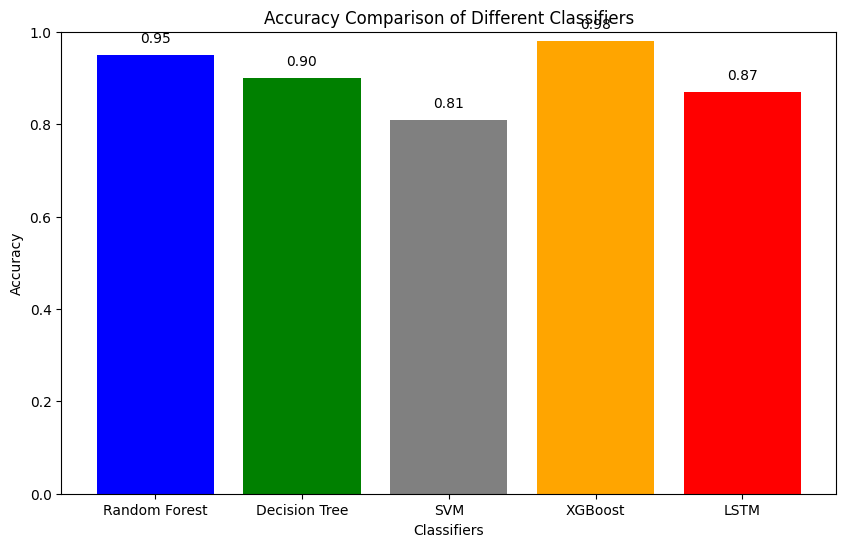

In [ ]:
import matplotlib.pyplot as plt

accuracy_rf = 0.95
accuracy_dt = 0.90
accuracy_svm = 0.81
accuracy_xgb = 0.98
accuracy_lstm = 0.87  # Update this with the actual LSTM accuracy after running the model

accuracies = {
    'Random Forest': accuracy_rf,
    'Decision Tree': accuracy_dt,
    'SVM': accuracy_svm,
    'XGBoost': accuracy_xgb,
    'LSTM': accuracy_lstm,  # Add LSTM accuracy to the comparison
}

classifiers = list(accuracies.keys())
accuracy_scores = list(accuracies.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracy_scores, color=['blue', 'green','gray','orange','red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)
plt.show()